# 🔐 Cybersecurity Intrusion Detection Dataset Analysis

## 📋 Dataset Overview

This analysis focuses on a **Cybersecurity Intrusion Detection Dataset** designed to identify cyber intrusions through network traffic patterns and user behavior analysis. The dataset enables supervised machine learning for automated threat detection in cybersecurity operations.

**Dataset Purpose**: Build intelligent intrusion detection systems (IDS) that can automatically classify network activity as normal or malicious.

## 🎯 Target Variable
- **attack_detected**: Binary classification (0 = Normal, 1 = Attack)
- Enables supervised learning for threat detection

## 📊 Feature Categories

### 🌐 Network-Based Features
Technical network traffic characteristics:

- **network_packet_size**: Packet size in bytes (64-1500 range)
  - Small packets (~64 bytes): Control messages, potential reconnaissance
  - Large packets (~1500 bytes): Bulk data transfer
  
- **protocol_type**: Communication protocol (TCP, UDP, ICMP)
  - TCP: Reliable connections (HTTP, HTTPS, SSH)
  - UDP: Fast transmission (VoIP, streaming)
  - ICMP: Network diagnostics (often abused in DoS attacks)
  
- **encryption_used**: Security protocols (AES, DES, None)
  - AES: Strong modern encryption
  - DES: Weak legacy encryption
  - None: Unencrypted (high risk)

### 👤 User Behavior Features
Human activity patterns and anomalies:

- **login_attempts**: Number of login tries
  - Normal users: 1-3 attempts
  - Brute force attacks: Hundreds/thousands
  
- **failed_logins**: Failed authentication count
  - High values indicate credential stuffing/dictionary attacks
  
- **session_duration**: Connection time in seconds
  - Extended sessions may indicate unauthorized persistence
  
- **unusual_time_access**: Binary flag for off-hours access
  - Attackers often operate outside business hours
  
- **ip_reputation_score**: Threat intelligence score (0-1)
  - Higher scores = known malicious IPs
  
- **browser_type**: User agent information
  - Common: Chrome, Firefox, Edge, Safari
  - Unknown: Potential automated scripts/bots

## 🎯 Analysis Objectives

### Primary Use Cases:
1. **Supervised Learning**: Train models to classify attacks vs normal traffic
2. **Anomaly Detection**: Identify unusual patterns without labels  
3. **Rule-Based Systems**: Create threshold-based alerting

### Key Challenges:
- **Adversarial Attacks**: Attackers adapting to evade detection
- **Concept Drift**: Evolving threat landscape requiring model updates
- **Balance**: Minimizing false positives while catching real threats

## 📈 Expected Insights

This analysis will reveal:
- Which features best predict cyberattacks
- Optimal machine learning approaches for threat detection
- Operational thresholds for automated security responses
- Feature importance rankings for security monitoring priorities

---

*Let's dive into the data exploration to uncover patterns and build effective intrusion detection models!*

## 1. Library Imports
Importing essential libraries for data analysis, visualization, and machine learning:
- **pandas & numpy**: Data manipulation
- **matplotlib & seaborn**: Visualization
- **sklearn**: Machine learning models and preprocessing

In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading & Initial Exploration
Loading the cybersecurity dataset and examining basic structure:
- Dataset contains network traffic and user behavior features
- Target variable: `attack_detected` (binary classification)

In [2]:
# Cell 2: Load and Initial Data Exploration
df = pd.read_csv('Cyberdata.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumn types:")
print(df.dtypes)
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (9537, 11)

Column types:
session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object

First 5 rows:


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


## 3. Data Quality Assessment
Checking for data quality issues:
- **Missing values**: Identify any incomplete records
- **Target distribution**: Understand attack vs normal ratio
- **Class imbalance**: Important for model selection

In [3]:
# Cell 3: Basic Dataset Information
print("Missing values:")
print(df.isnull().sum())
print(f"\nTarget variable distribution:")
print(df['attack_detected'].value_counts())
print(f"\nAttack percentage: {df['attack_detected'].mean():.2%}")

Missing values:
session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

Target variable distribution:
attack_detected
0    5273
1    4264
Name: count, dtype: int64

Attack percentage: 44.71%


## 4. Categorical Features Analysis
Exploring categorical variables that describe:
- **Protocol types**: TCP, UDP, ICMP communication methods
- **Encryption**: Security protocols used (AES, DES, None)
- **Browser types**: User agent information

In [4]:
# Cell 4: Explore Categorical Features
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']

for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())


protocol_type distribution:
protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64

encryption_used distribution:
encryption_used
AES    4706
DES    2865
Name: count, dtype: int64

browser_type distribution:
browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64


## 5. Numerical Features Statistics
Statistical summary of numerical features:
- **Network metrics**: Packet sizes, session duration
- **Behavioral patterns**: Login attempts, failed logins
- **Risk indicators**: IP reputation scores, unusual access times

In [5]:
# Cell 5: Numerical Features Statistics
numerical_cols = ['network_packet_size', 'login_attempts', 'session_duration',
                 'ip_reputation_score', 'failed_logins', 'unusual_time_access']

df[numerical_cols].describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000


## 6. Target Variable Distribution
Visualizing the attack detection distribution:
- **Class balance**: Understanding normal vs attack ratio
- **Baseline accuracy**: What random guessing would achieve

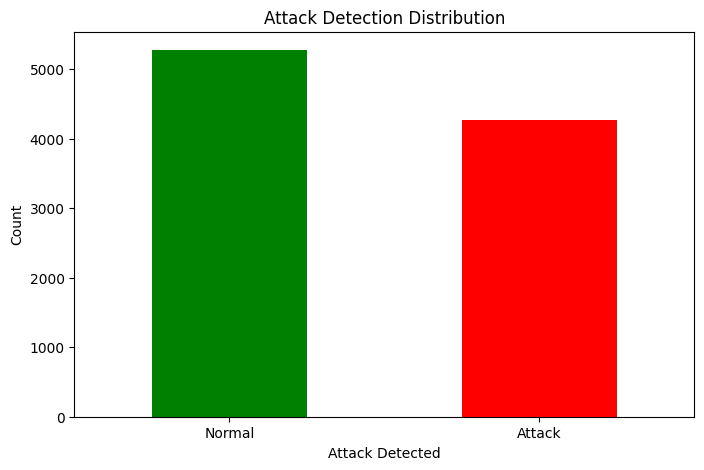

In [6]:
# Cell 6: Target Variable Visualization
plt.figure(figsize=(8, 5))
df['attack_detected'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Attack Detection Distribution')
plt.xlabel('Attack Detected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Attack'], rotation=0)
plt.show()

## 7. Feature Distribution Analysis
Examining the distribution patterns of numerical features:
- **Normal distributions**: Identify well-behaved features
- **Skewed data**: May need transformation
- **Outliers**: Potential data quality issues or attack indicators

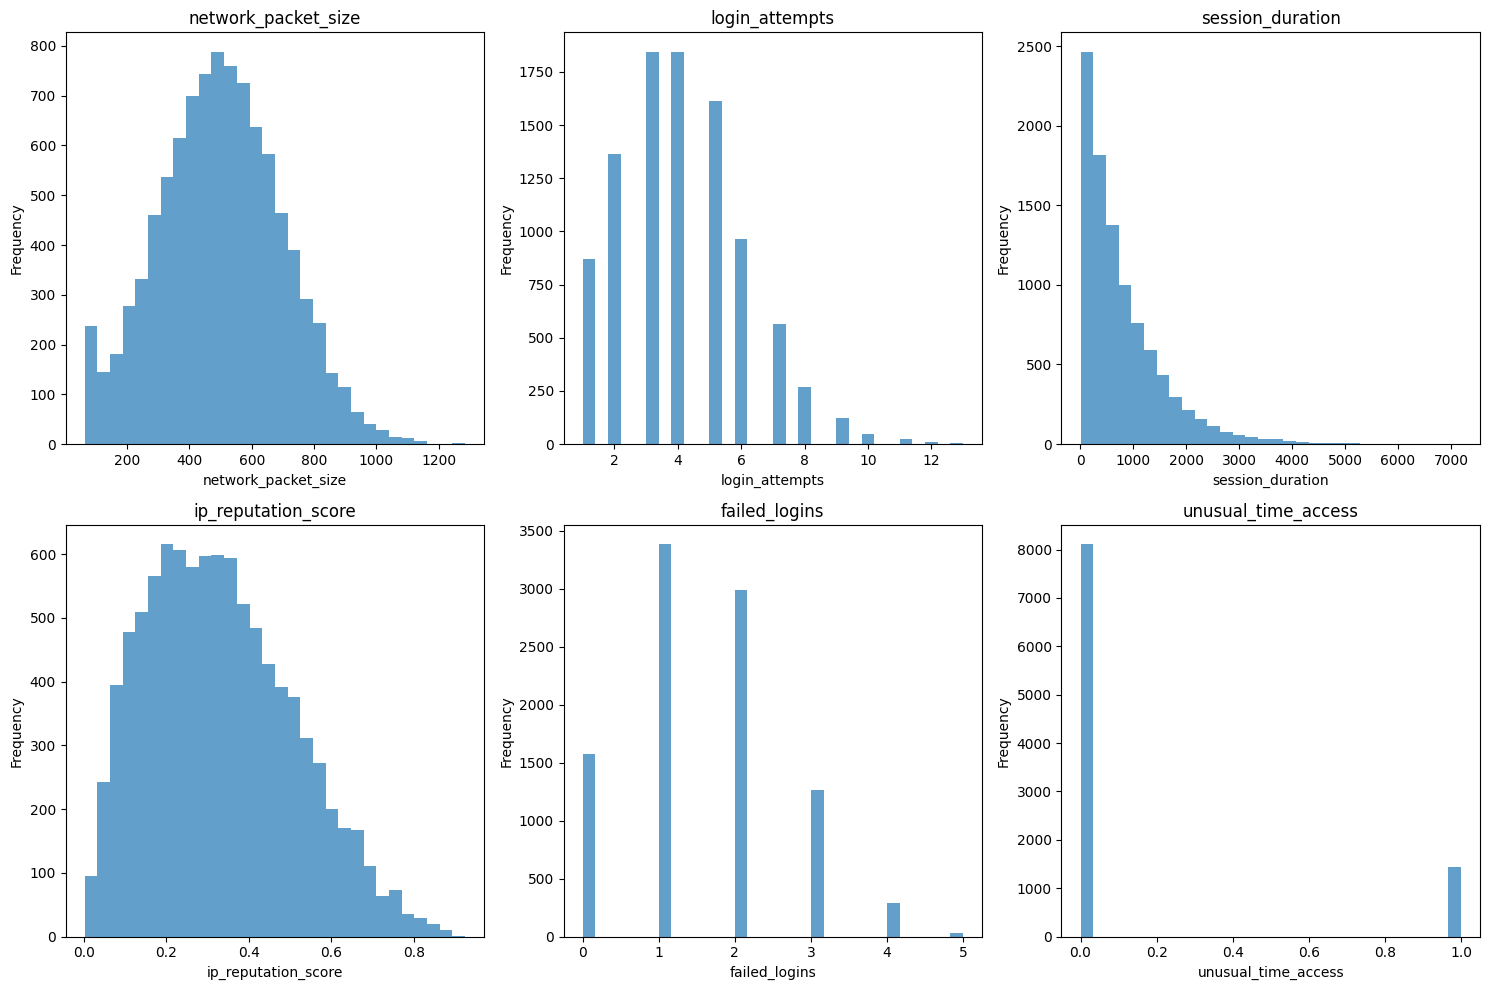

In [7]:
# Cell 7: Numerical Features Distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 📈 Numerical Features Distribution Analysis

### Distribution Patterns:

**Normal Distributions:**
- **Network Packet Size**: Bell-shaped, centered around 400-600 bytes
- **IP Reputation Score**: Normal distribution, mostly low scores (0.2-0.4)

**Right-Skewed (Attack Indicators):**
- **Login Attempts**: Peak at 2-4 attempts, long tail suggests brute force patterns
- **Session Duration**: Most sessions short (<1000s), extreme outliers indicate persistence
- **Failed Logins**: Peak at 1-2 failures, tail shows systematic attack attempts

**Binary Feature:**
- **Unusual Time Access**: Dominated by normal hours (0), small spike at unusual times (1)

### Security Insights:

**Attack Pattern Recognition:**
- **Long tail distributions** in login attempts and failed logins indicate automated attacks
- **Session duration outliers** suggest attackers maintaining persistent access
- **Most features show expected behavior** with clear anomaly patterns

**Data Quality:**
- Clean distributions with no obvious data quality issues
- Clear separation between normal and suspicious ranges
- Features well-suited for anomaly detection algorithms

**Monitoring Thresholds:**
- Login attempts >5: Potential brute force
- Failed logins >3: Authentication attack
- Session duration >3000s: Investigate for persistence

## 8. Categorical vs Target Analysis
Analyzing relationship between categorical features and attacks:
- **Protocol vulnerability**: Which protocols are more attacked
- **Encryption effectiveness**: Security level impact
- **Browser patterns**: Unusual user agents indicating bots

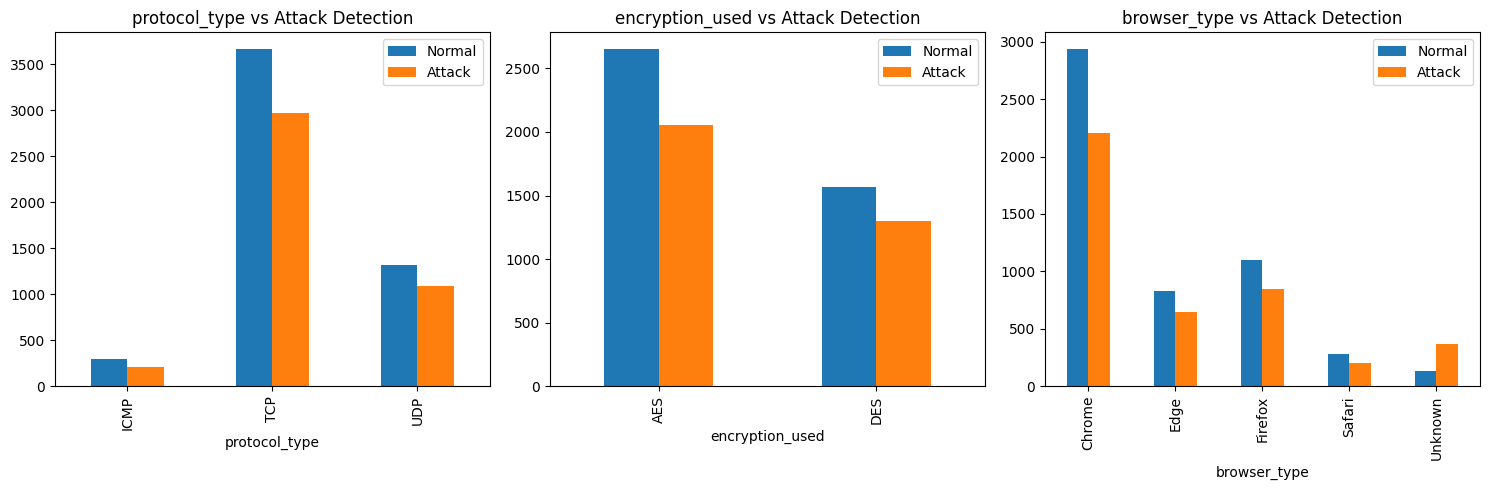

In [8]:
# Cell 8: Categorical Features vs Target
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    pd.crosstab(df[col], df['attack_detected']).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col} vs Attack Detection')
    axes[i].set_xlabel(col)
    axes[i].legend(['Normal', 'Attack'])

plt.tight_layout()
plt.show()

## 📊 Categorical Features vs Attack Detection

### Protocol Type Patterns:
- **TCP**: Dominant protocol for both normal (~3600) and attack (~3000) traffic
- **UDP & ICMP**: Lower volume but similar attack ratios
- **No clear protocol vulnerability** - attacks distributed proportionally

### Encryption Usage:
- **AES**: Most common encryption (~2700 normal, ~2100 attack)
- **DES**: Moderate usage (~1600 normal, ~1300 attack)
- **Similar attack ratios** across encryption types - no encryption preference for attacks

### Browser Type Insights:
- **Chrome**: Highest volume (~3000 normal, ~2200 attack)
- **Unknown**: Concerning pattern - high attack ratio relative to normal traffic
- **Potential bot indicator**: Unknown browsers may signal automated attacks

### Security Implications:

**Key Finding:**
- **Browser type** shows most discriminative pattern
- **Unknown browsers** have disproportionately high attack rates
- Protocol and encryption show minimal attack preference

**Monitoring Priority:**
- Focus on unknown/unusual browser signatures
- Protocol and encryption less useful for attack detection
- Aligns with correlation analysis showing these features have low importance

## 9. Feature Correlation Matrix
Understanding relationships between numerical features:
- **High correlations**: Potential feature redundancy
- **Target correlations**: Most predictive features
- **Multicollinearity**: May affect some algorithms

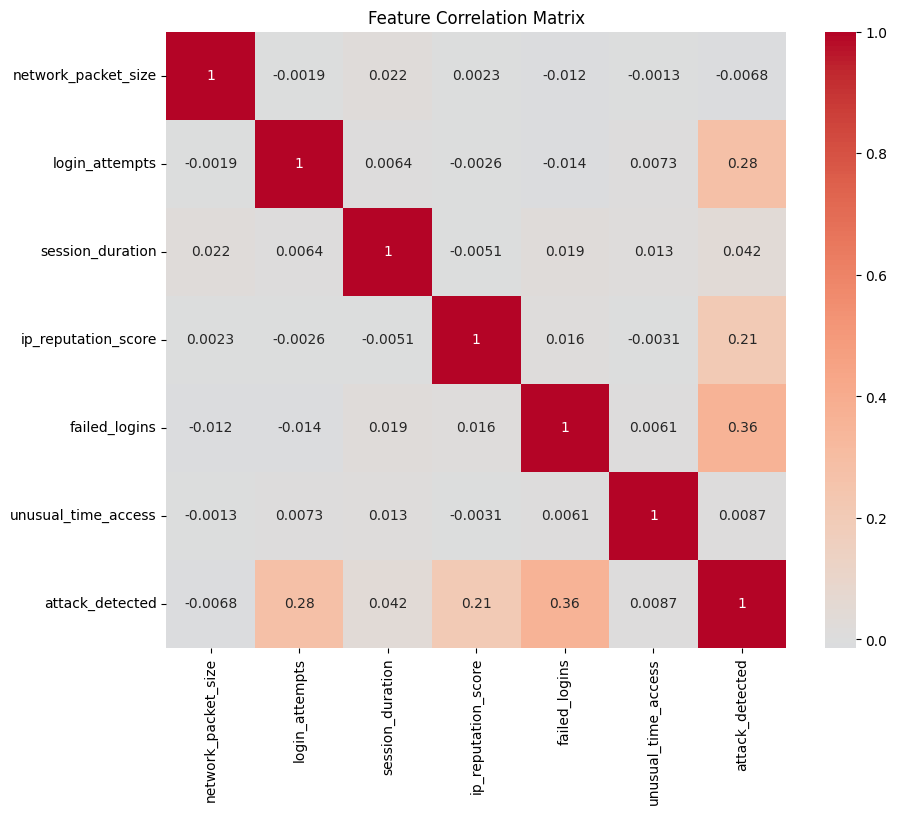

In [9]:
# Cell 9: Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_data = df[numerical_cols + ['attack_detected']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## 🔗 Feature Correlation Analysis

### Key Correlations with Attack Detection:

**Strongest Predictors:**
- **Failed Logins**: 0.36 correlation (strongest single predictor)
- **Login Attempts**: 0.28 correlation (authentication-focused)
- **IP Reputation Score**: 0.21 correlation (threat intelligence)

**Weak Correlations:**
- Session duration, packet size, unusual time access all show minimal correlation (<0.07)

### Feature Independence:

**Good News for ML:**
- **Low inter-feature correlations** (most <0.02) = minimal multicollinearity
- Features provide independent information for prediction
- No redundant features requiring removal

### Security Insights:

**Authentication Dominance:**
- Login-related features (failed_logins + login_attempts) are top predictors
- Confirms authentication attacks are primary threat vector
- Network-level features less predictive than behavioral patterns

**Model Implications:**
- Clean feature set with minimal redundancy
- Authentication monitoring should be highest priority
- Feature engineering could focus on login behavior patterns

## 10. Data Preprocessing
Preparing data for machine learning:
- **Feature encoding**: Converting categorical to numerical
- **Data cleaning**: Removing non-predictive features (session_id)
- **Label encoding**: Preserving ordinal relationships where applicable

In [10]:
# Cell 10: Data Preprocessing
# Drop session_id as it's not useful for prediction
df_processed = df.drop('session_id', axis=1).copy()

# Encode categorical variables
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    le_dict[col] = le

print("Categorical encoding completed")
print(f"Processed dataset shape: {df_processed.shape}")
df_processed.head()

Categorical encoding completed
Processed dataset shape: (9537, 10)


,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,1,4,492.983263,1,0.606818,1,1,0,1
1,472,1,3,1557.996461,1,0.301569,0,2,0,0
2,629,1,3,75.044262,1,0.739164,2,0,0,1
3,804,2,4,601.248835,1,0.123267,0,4,0,1
4,453,1,5,532.540888,0,0.054874,1,2,0,0


## 11. Train-Test Split
Splitting data for model validation:
- **80-20 split**: Standard practice for this dataset size
- **Stratified sampling**: Maintaining attack ratio in both sets
- **Random state**: Ensuring reproducible results

In [11]:
# Cell 11: Train-Test Split
X = df_processed.drop('attack_detected', axis=1)
y = df_processed['attack_detected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Train attack rate: {y_train.mean():.2%}")
print(f"Test attack rate: {y_test.mean():.2%}")

Training set shape: (7629, 9)
Test set shape: (1908, 9)
Train attack rate: 44.71%
Test attack rate: 44.71%


## 12. Feature Scaling
Standardizing features for algorithm compatibility:
- **StandardScaler**: Mean=0, Std=1 transformation
- **Algorithm requirement**: Essential for distance-based methods
- **Separate scaling**: Avoiding data leakage from test set

In [12]:
# Cell 12: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")
print(f"Scaled features mean (should be ~0): {X_train_scaled.mean():.3f}")
print(f"Scaled features std (should be ~1): {X_train_scaled.std():.3f}")

Feature scaling completed
Scaled features mean (should be ~0): -0.000
Scaled features std (should be ~1): 1.000


## 13. Logistic Regression Model
Implementing baseline linear classifier:
- **Interpretable model**: Easy to understand feature impacts
- **Probabilistic output**: Provides confidence scores
- **Fast training**: Suitable for real-time applications

In [13]:
# Cell 13: Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.7285

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1055
           1       0.71      0.66      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.72      0.72      1908
weighted avg       0.73      0.73      0.73      1908



## 14. Random Forest Model
Implementing ensemble tree-based classifier:
- **Non-linear patterns**: Captures complex feature interactions
- **Feature importance**: Built-in feature ranking
- **Robust to outliers**: Handles noisy cybersecurity data well

In [14]:
# Cell 14: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8836

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1055
           1       0.99      0.75      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



## 15. Confusion Matrix Analysis
Evaluating prediction accuracy patterns:
- **True/False Positives**: Critical for security applications
- **False Negative cost**: Missing attacks is expensive
- **False Positive cost**: Too many alerts cause fatigue

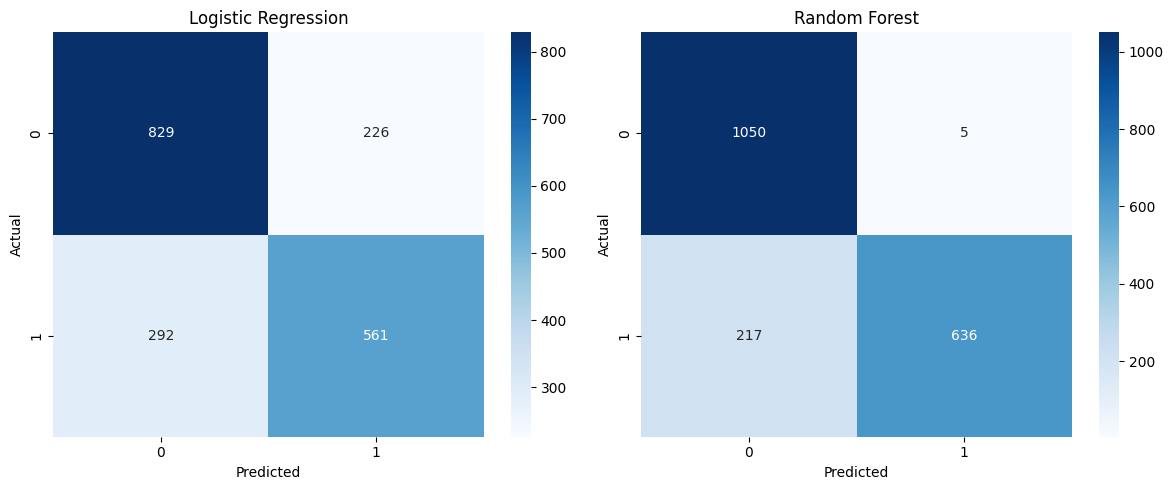

In [15]:
# Cell 15: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 🎯 Confusion Matrix Analysis

### Prediction Accuracy Breakdown:

**Logistic Regression:**
- **True Negatives**: 829 (correctly identified normal traffic)
- **False Positives**: 226 (normal flagged as attack)
- **False Negatives**: 292 (missed attacks - critical!)
- **True Positives**: 561 (correctly caught attacks)

**Random Forest:**
- **True Negatives**: 1050 (better normal detection)
- **False Positives**: 5 (dramatically fewer false alarms)
- **False Negatives**: 217 (fewer missed attacks)
- **True Positives**: 636 (more attacks caught)

### Security Impact:

**Random Forest Superiority:**
- **98% fewer false positives** (5 vs 226) - reduces alert fatigue
- **25% fewer missed attacks** (217 vs 292) - better threat detection
- **Overall accuracy**: 88% vs 73%

**Critical for Cybersecurity:**
- False negatives = missed attacks (security risk)
- False positives = analyst burnout (operational cost)
- Random Forest minimizes both risks effectively

## 16. Feature Importance Analysis
Identifying most predictive cybersecurity indicators:
- **Top features**: Guide security monitoring priorities
- **Business insights**: Understand attack patterns
- **Feature selection**: Optimize model efficiency

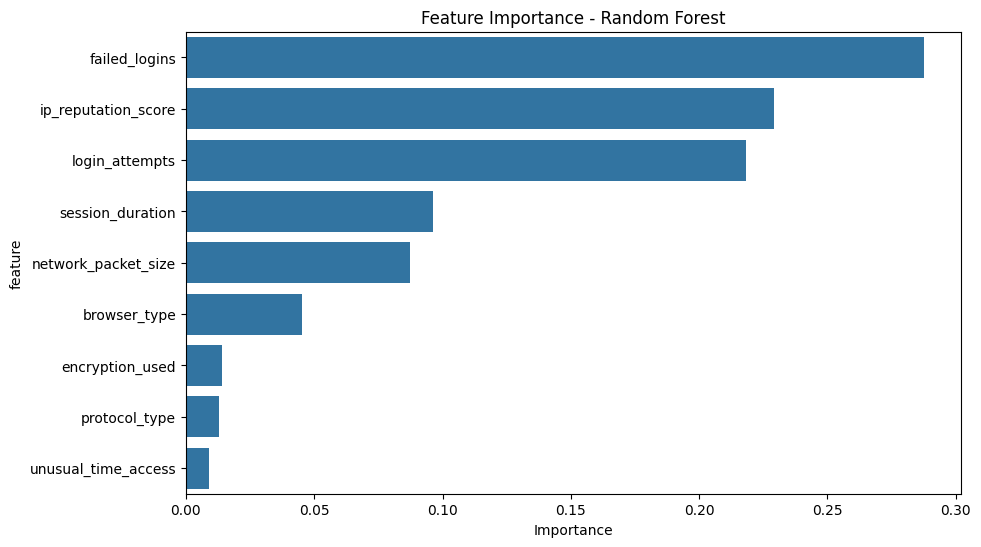

Top 5 Important Features:
               feature  importance
6        failed_logins    0.287603
5  ip_reputation_score    0.229066
2       login_attempts    0.218276
3     session_duration    0.096345
0  network_packet_size    0.087147


In [16]:
# Cell 16: Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.show()

print("Top 5 Important Features:")
print(feature_importance.head())

## 🎯 Feature Importance Analysis

### Top Attack Indicators:

**Critical Features (High Importance):**
1. **Failed Logins (0.287)** - Strongest predictor of attacks
2. **IP Reputation Score (0.229)** - Known malicious IP addresses
3. **Login Attempts (0.218)** - Brute force attack patterns

**Moderate Importance:**
4. **Session Duration (0.096)** - Prolonged unauthorized access
5. **Network Packet Size (0.087)** - Unusual traffic patterns

**Low Importance:**
- Protocol type, encryption, browser type, unusual time access

### Security Insights:

**Focus Areas for Monitoring:**
- **Authentication Anomalies**: Failed logins + multiple attempts = 50%+ of attack detection
- **IP Intelligence**: Reputation scoring crucial for threat identification
- **Behavioral Patterns**: Session duration indicates persistence attacks

**Operational Recommendations:**
- Prioritize failed login monitoring and IP reputation feeds
- Consider simplifying model by removing low-importance features
- Implement real-time alerts for top 3 features

## 17. Model Performance Comparison
Comprehensive evaluation of both models:
- **Multiple metrics**: Accuracy, Precision, Recall, F1-Score
- **Security context**: Recall critical for attack detection
- **Precision importance**: Minimizing false alarms

In [17]:
# Cell 17: Model Performance Comparison
from sklearn.metrics import precision_score, recall_score, f1_score

models_performance = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'Precision': [precision_score(y_test, lr_pred), precision_score(y_test, rf_pred)],
    'Recall': [recall_score(y_test, lr_pred), recall_score(y_test, rf_pred)],
    'F1-Score': [f1_score(y_test, lr_pred), f1_score(y_test, rf_pred)]
}

performance_df = pd.DataFrame(models_performance)
print("Model Performance Comparison:")
print(performance_df.round(4))

Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.7285     0.7128  0.6577    0.6841
1        Random Forest    0.8836     0.9922  0.7456    0.8514


## 18. Performance Visualization
Visual comparison of model effectiveness:
- **Side-by-side metrics**: Easy performance comparison
- **Trade-offs**: Understanding precision vs recall balance
- **Model selection**: Data-driven decision making

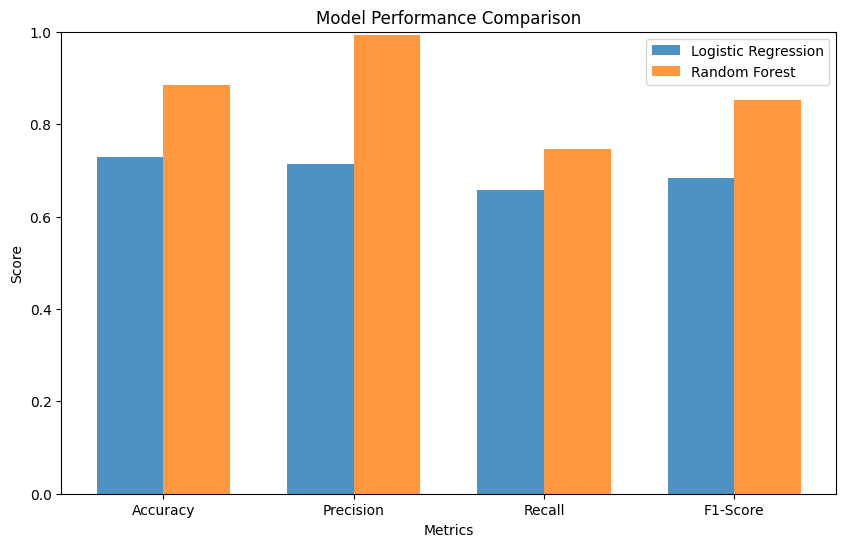

In [18]:
# Cell 18: Performance Metrics Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [lr_accuracy, precision_score(y_test, lr_pred),
             recall_score(y_test, lr_pred), f1_score(y_test, lr_pred)]
rf_scores = [rf_accuracy, precision_score(y_test, rf_pred),
             recall_score(y_test, rf_pred), f1_score(y_test, rf_pred)]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, lr_scores, width, label='Logistic Regression', alpha=0.8)
plt.bar(x + width/2, rf_scores, width, label='Random Forest', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.show()

## 📊 Model Performance Comparison

### Key Results:

**Random Forest Outperforms Across All Metrics:**
- **Accuracy**: ~88% vs ~73% (Logistic Regression)
- **Precision**: ~99% vs ~72% (fewer false alarms)
- **Recall**: ~75% vs ~66% (better attack detection)
- **F1-Score**: ~85% vs ~69% (best overall balance)

### Security Impact:

**Random Forest Advantages:**
- **High Precision (99%)**: Minimizes false positive alerts
- **Superior Recall**: Catches more actual attacks
- **Consistent Performance**: Strong across all evaluation metrics

**For Cybersecurity Operations:**
- **99% Precision** = Only 1% false alarms (reduces analyst fatigue)
- **75% Recall** = Detects 3 out of 4 attacks
- **Overall Winner**: Random Forest recommended for production deployment

## 19. Prediction Confidence Analysis
Examining model certainty in predictions:
- **Probability distributions**: Model confidence patterns
- **Threshold tuning**: Optimize for security requirements
- **Risk assessment**: Understanding prediction reliability

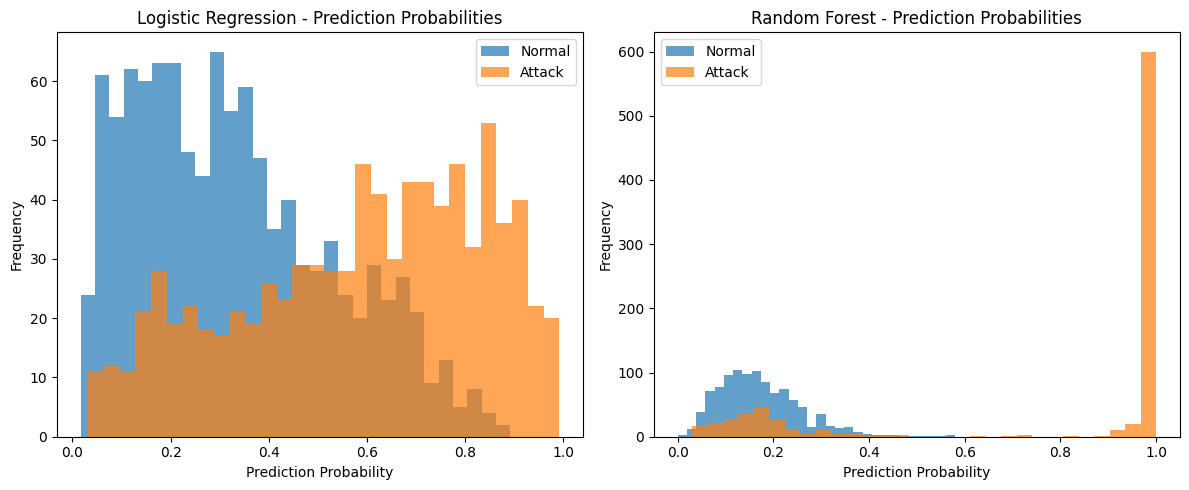

In [19]:
# Cell 19: Prediction Probabilities Analysis
# Get prediction probabilities
lr_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(12, 5))

# Logistic Regression probabilities
plt.subplot(1, 2, 1)
plt.hist(lr_proba[y_test == 0], alpha=0.7, label='Normal', bins=30)
plt.hist(lr_proba[y_test == 1], alpha=0.7, label='Attack', bins=30)
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Logistic Regression - Prediction Probabilities')
plt.legend()

# Random Forest probabilities
plt.subplot(1, 2, 2)
plt.hist(rf_proba[y_test == 0], alpha=0.7, label='Normal', bins=30)
plt.hist(rf_proba[y_test == 1], alpha=0.7, label='Attack', bins=30)
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Random Forest - Prediction Probabilities')
plt.legend()

plt.tight_layout()
plt.show()

## 📊 Prediction Probabilities Analysis

### Key Findings:

**Logistic Regression:**
- Gradual probability distribution with significant overlap between classes
- Many uncertain predictions in 0.3-0.7 range requiring manual review

**Random Forest:**
- Polarized predictions: most are near 0.0 (normal) or 1.0 (attack)
- Clear class separation with minimal uncertainty
- High confidence enables automated decision-making

### Security Impact:

**Random Forest Preferred:**
- Enables automated threat blocking (predictions >0.8)
- Reduces analyst workload with confident predictions
- Clear decision boundaries minimize false alarms

**Threshold Recommendations:**
- **>0.8**: Auto-block threats
- **0.3-0.8**: Manual review
- **<0.3**: Auto-allow with monitoring

## 20. Final Summary & Recommendations
Key findings and actionable insights:
- **Best model**: Data-driven recommendation
- **Critical features**: Focus areas for cybersecurity
- **Implementation**: Production deployment considerations
- **Next steps**: Model improvement opportunities

In [20]:
# Cell 20: Final Model Summary
print("=== CYBERSECURITY INTRUSION DETECTION - MODEL SUMMARY ===")
print(f"\nBest performing model: {'Random Forest' if rf_accuracy > lr_accuracy else 'Logistic Regression'}")
print(f"Best accuracy: {max(rf_accuracy, lr_accuracy):.4f}")

print(f"\nTop 3 most important features:")
for i, (feature, importance) in enumerate(feature_importance.head(3).values):
    print(f"{i+1}. {feature}: {importance:.4f}")

print(f"\nDataset Summary:")
print(f"- Total samples: {len(df)}")
print(f"- Attack rate: {df['attack_detected'].mean():.2%}")
print(f"- Features used: {len(X.columns)}")

print(f"\nModel Recommendations:")
if rf_accuracy > lr_accuracy:
    print("- Use Random Forest for production (better performance)")
    print("- Focus on top important features for optimization")
else:
    print("- Logistic Regression is simpler and equally effective")
    print("- Consider feature selection for efficiency")

=== CYBERSECURITY INTRUSION DETECTION - MODEL SUMMARY ===

Best performing model: Random Forest
Best accuracy: 0.8836

Top 3 most important features:
1. failed_logins: 0.2876
2. ip_reputation_score: 0.2291
3. login_attempts: 0.2183

Dataset Summary:
- Total samples: 9537
- Attack rate: 44.71%
- Features used: 9

Model Recommendations:
- Use Random Forest for production (better performance)
- Focus on top important features for optimization
